**Задание 1.Обнаружение и обработка пропущенных значений**<br>
**Датасет**:titanic (пассажиры Титаника)<br>
**Источник**:seaborn.load_dataset("titanic")<br>

**Инструкции**:
- Загрузите датасет titanic .
- Определите количество пропущенных значений в каждом столбце.
- Визуализируйте пропуски с помощью библиотеки missingno
- Заполните пропущенные значения:
  - признак age — средним значением;
  - признак embarked — наиболее частым значением
  - признак deck — удалите.
- Отобразите информацию о таблице до и после обработки ( .info() , .isna().sum() ).


Пропуски ДО обработки:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


<Figure size 1200x600 with 0 Axes>

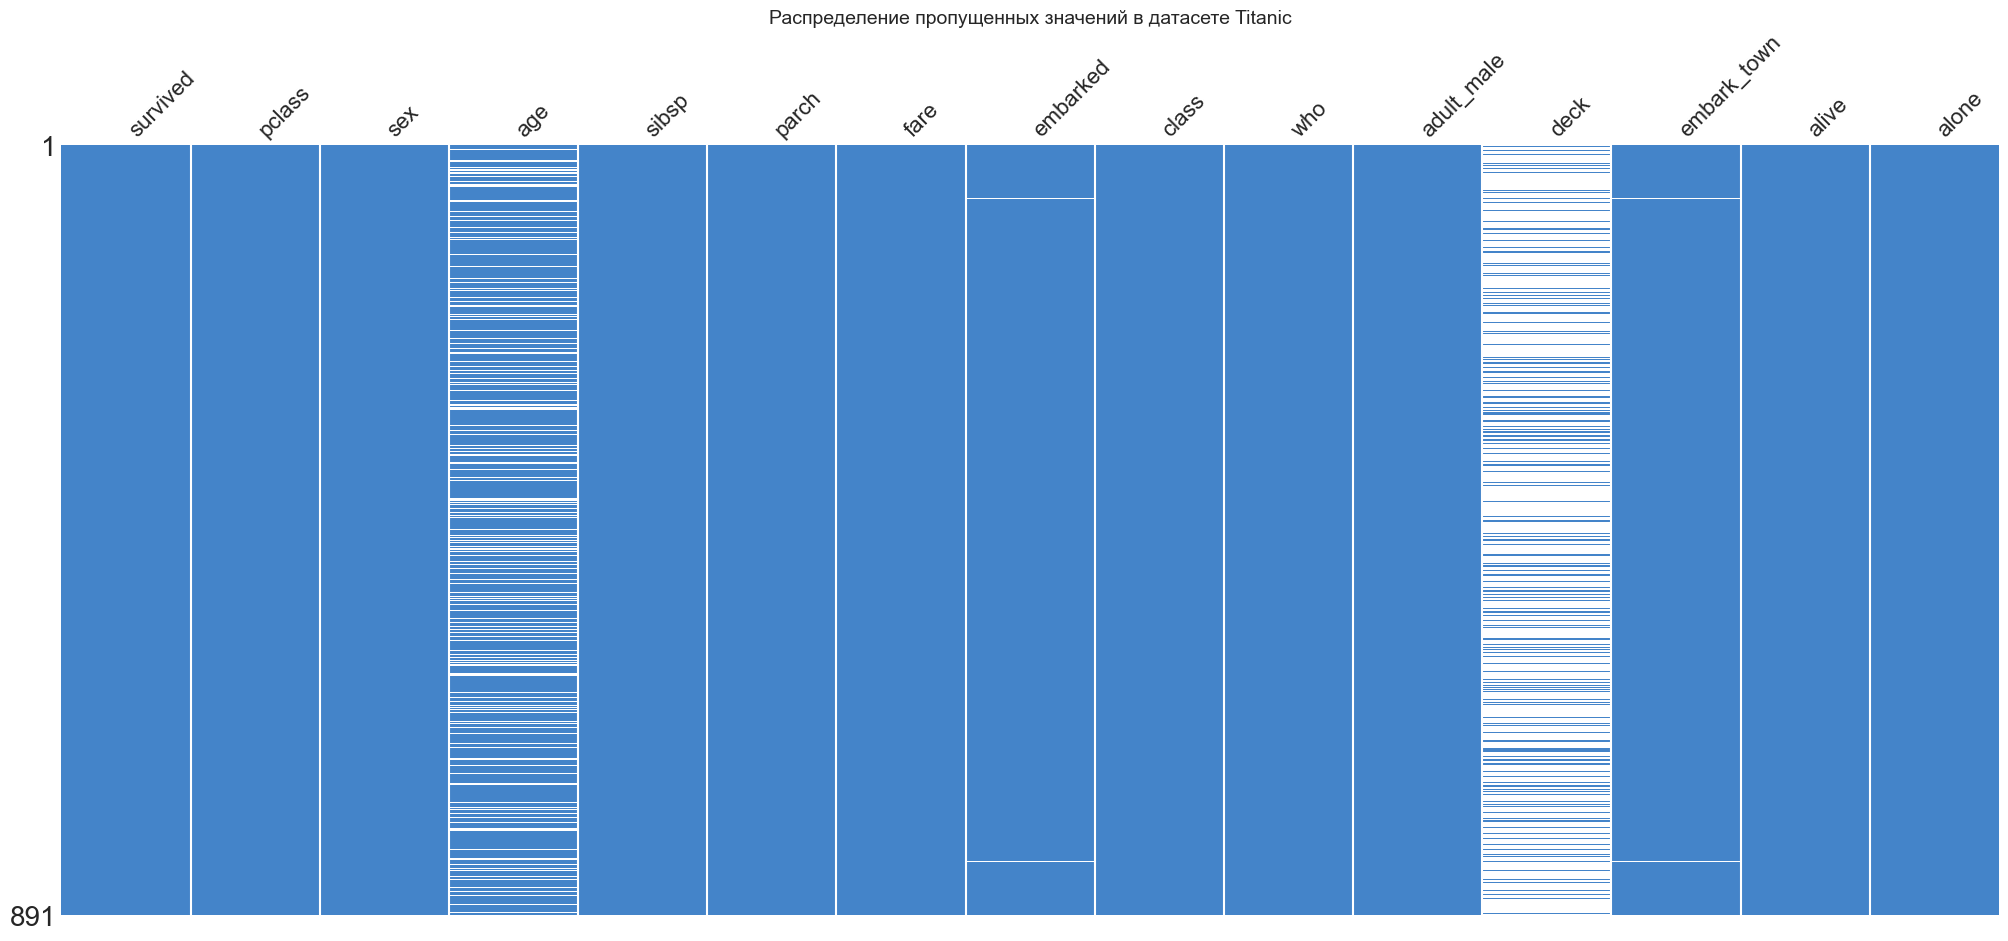

               ДАННЫЕ ДО ОБРАБОТКИ                
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Пропущенные значения:


In [5]:
import seaborn as sns
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')

print("Пропуски ДО обработки:")
print(titanic.isna().sum())

plt.figure(figsize=(12, 6))
msno.matrix(titanic, color=(0.27, 0.52, 0.79), sparkline=False)
plt.title('Распределение пропущенных значений в датасете Titanic', fontsize=14)
plt.show()

titanic_processed = titanic.copy()


titanic_processed['age'] = titanic_processed['age'].fillna(titanic_processed['age'].mean())


embarked_mode = titanic_processed['embarked'].mode()[0]
titanic_processed['embarked'] = titanic_processed['embarked'].fillna(embarked_mode)

titanic_processed = titanic_processed.drop(columns='deck')

print("ДАННЫЕ ДО ОБРАБОТКИ".center(50))
print(titanic.info())
print("\nПропущенные значения:")
print(titanic.isna().sum())

print("ДАННЫЕ ПОСЛЕ ОБРАБОТКИ")

print(titanic_processed.info())
print("\nПропущенные значения:")
print(titanic_processed.isna().sum())

**Задание 2.Обнаружение и удаление выбросов**<br>
**Датасет**:penguins (описание антарктических пингвинов)<br>
**Источник**:seaborn.load_dataset("penguins")<br>

**Инструкции**:
- Загрузите датасет penguins.
- Постройте boxplot-графики для признаков bill_length_mm , bill_depth_mm ,
flipper_length_mm , body_mass_g.
- Используя метод межквартильного размаха (IQR), выявите и удалите выбросы
по каждому из указанных признаков
- Сравните размеры датасета до и после фильтрации.
- Постройте boxplot-график до и после удаления выбросов для одного из
признаков.

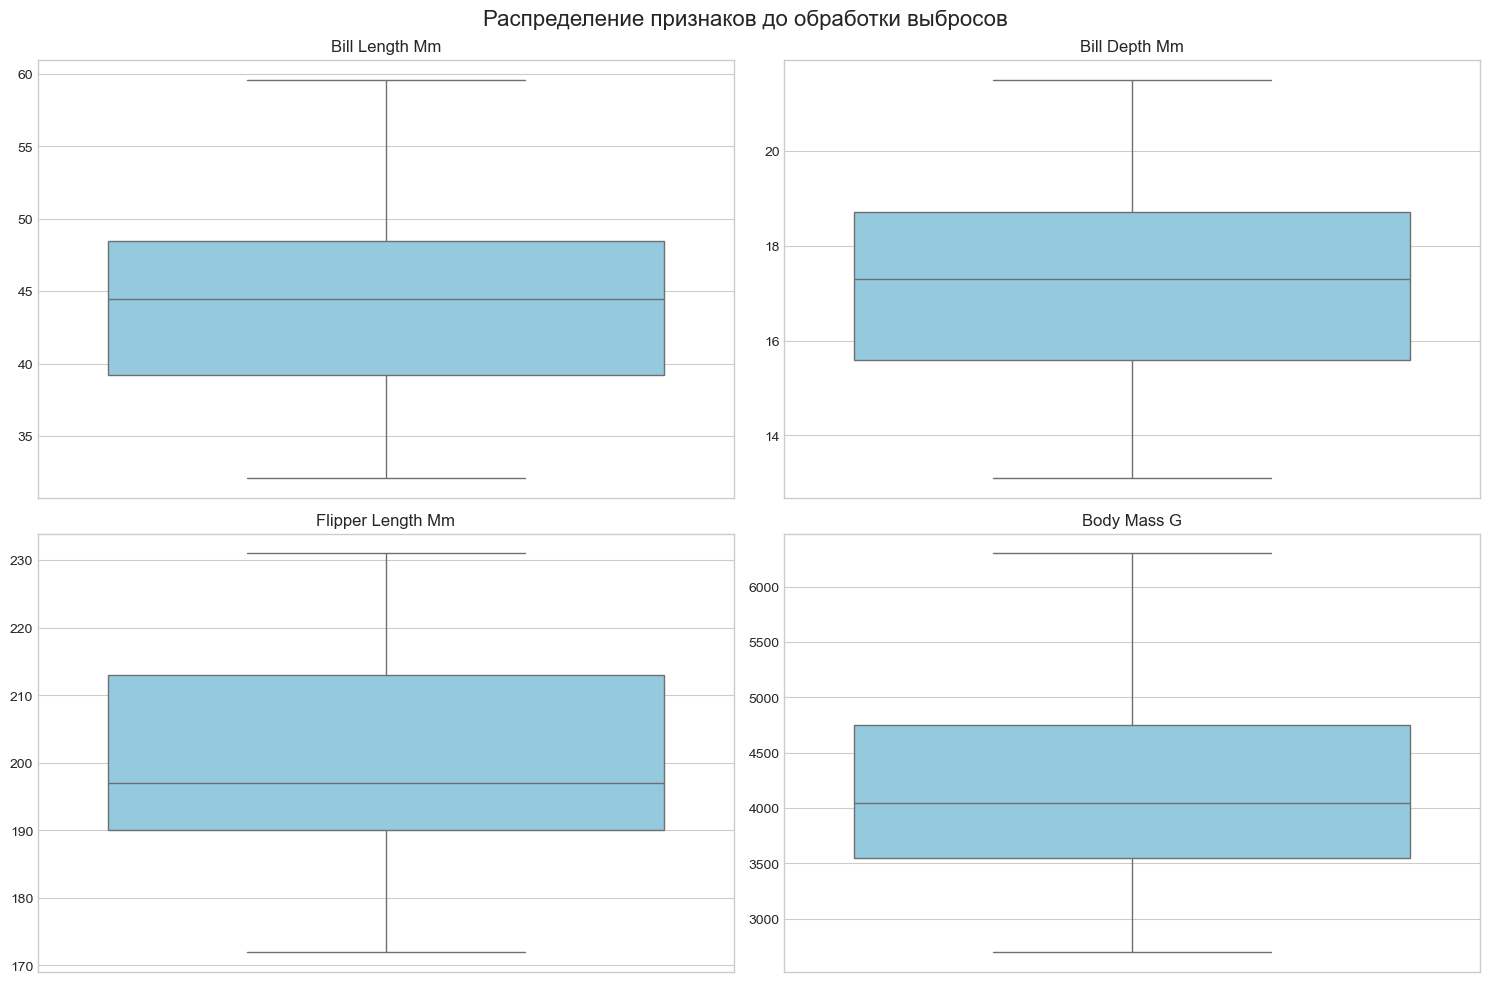

Размер датасета ДО обработки: 344 строк
Размер датасета ПОСЛЕ обработки: 342 строк
Удалено строк: 2 (0.58%)


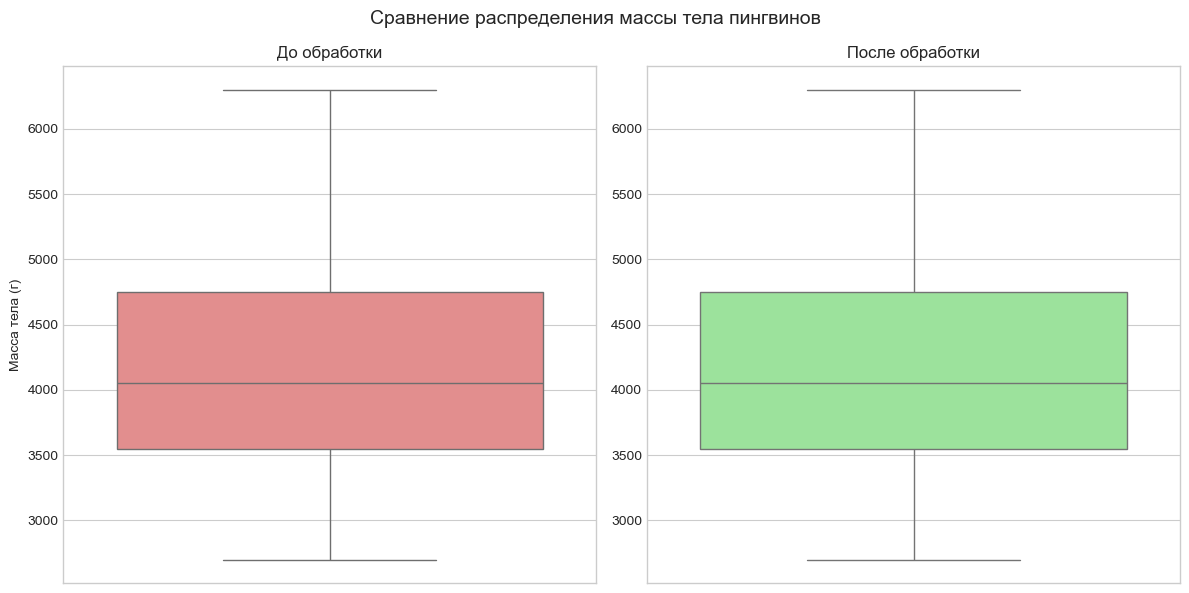

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

penguins = sns.load_dataset('penguins')

features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

plt.figure(figsize=(15, 10))
plt.suptitle('Распределение признаков до обработки выбросов', fontsize=16)

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=penguins[feature], color='skyblue')
    plt.title(f'{feature.replace("_", " ").title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

original_size = penguins.shape[0]
penguins_clean = remove_outliers(penguins, features)
new_size = penguins_clean.shape[0]

print(f"Размер датасета ДО обработки: {original_size} строк")
print(f"Размер датасета ПОСЛЕ обработки: {new_size} строк")
print(f"Удалено строк: {original_size - new_size} ({((original_size - new_size)/original_size)*100:.2f}%)")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=penguins['body_mass_g'], color='lightcoral')
plt.title('До обработки')
plt.ylabel('Масса тела (г)')

plt.subplot(1, 2, 2)
sns.boxplot(y=penguins_clean['body_mass_g'], color='lightgreen')
plt.title('После обработки')
plt.ylabel('')

plt.suptitle('Сравнение распределения массы тела пингвинов', fontsize=14)
plt.tight_layout()
plt.show()

**Задание 3.Масштабирование числовых признаков**<br>
**Датасет**:california housing<br>
**Источник**:from sklearn.datasets import fetch_california_housing<br>

**Инструкции**:
- Загрузите данные с помощью fetch_california_housing(as_frame=True) .
- Преобразуйте данные в pandas.DataFrame.
- Выполните::
  - стандартизацию признаков с помощью StandardScaler ;
  - нормализацию в диапазон [0, 1] с помощью MinMaxScaler (на копии
таблицы).
- Постройте гистограммы распределения признака MedInc до и после
масштабирования.
- Сравните поведение шкал на гистограммах

Размер датасета: (20640, 9)

Первые 5 строк:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Описание признаков:
- MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household me

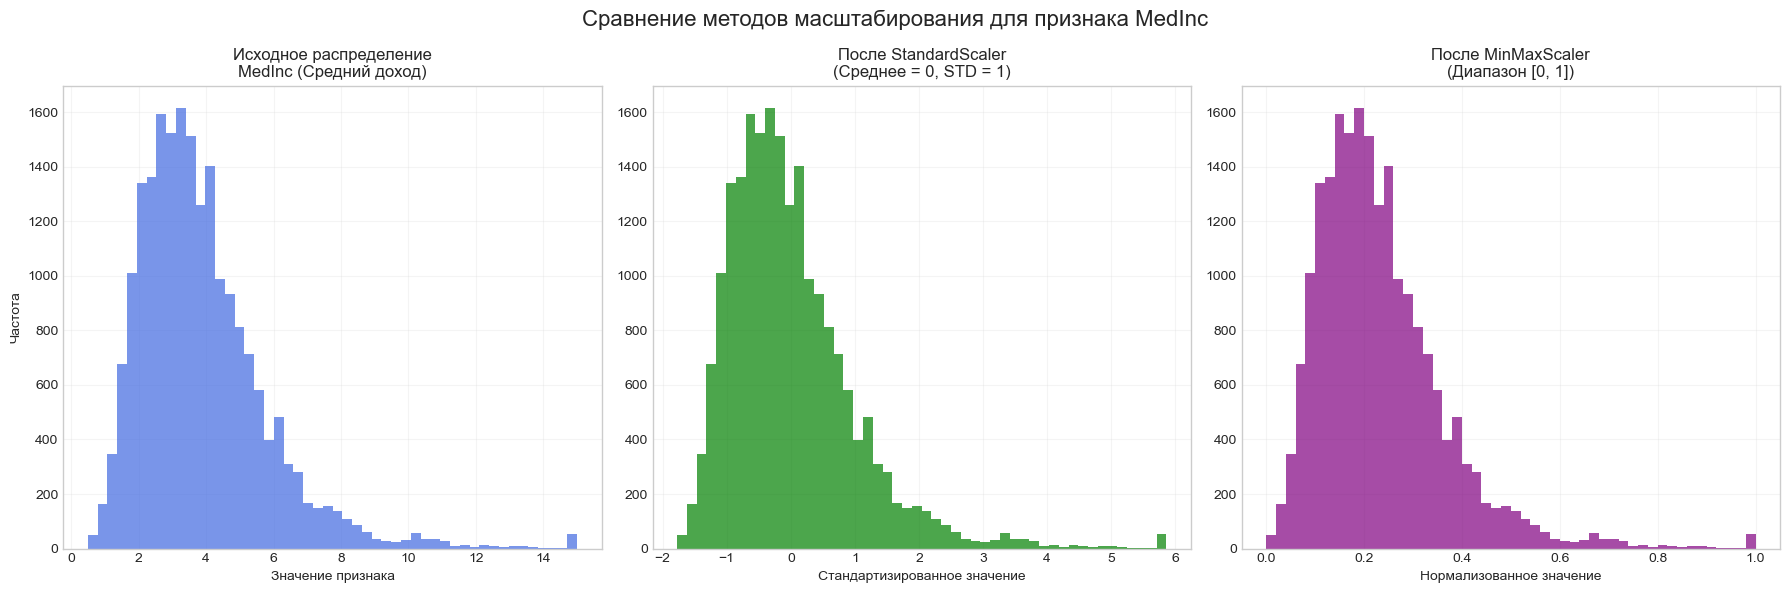

       СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ MedInc       
       Original  StandardScaler  MinMaxScaler
count  20640.00        20640.00      20640.00
mean       3.87            0.00          0.23
std        1.90            1.00          0.13
min        0.50           -1.77          0.00
25%        2.56           -0.69          0.14
50%        3.53           -0.18          0.21
75%        4.74            0.46          0.29
max       15.00            5.86          1.00


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Загрузка данных и преобразование в DataFrame
california = fetch_california_housing(as_frame=True)
df = california.frame

print(f"Размер датасета: {df.shape}")
print("\nПервые 5 строк:")
print(df.head())
print("\nОписание признаков:")
print(california.DESCR.split(":Attribute Information:")[1].split(":Notes:")[0].strip())

df_minmax = df.copy()

scaler_standard = StandardScaler()
df_standard = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)

scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_minmax), columns=df_minmax.columns)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(df['MedInc'], bins=50, color='royalblue', alpha=0.7)
plt.title('Исходное распределение\nMedInc (Средний доход)', fontsize=12)
plt.xlabel('Значение признака')
plt.ylabel('Частота')
plt.grid(alpha=0.2)

plt.subplot(1, 3, 2)
plt.hist(df_standard['MedInc'], bins=50, color='green', alpha=0.7)
plt.title('После StandardScaler\n(Среднее = 0, STD = 1)', fontsize=12)
plt.xlabel('Стандартизированное значение')
plt.grid(alpha=0.2)

plt.subplot(1, 3, 3)
plt.hist(df_minmax['MedInc'], bins=50, color='purple', alpha=0.7)
plt.title('После MinMaxScaler\n(Диапазон [0, 1])', fontsize=12)
plt.xlabel('Нормализованное значение')
plt.grid(alpha=0.2)

plt.suptitle('Сравнение методов масштабирования для признака MedInc', fontsize=16)
plt.tight_layout()
plt.show()

medinc_stats = pd.DataFrame({
    'Original': df['MedInc'].describe(),
    'StandardScaler': df_standard['MedInc'].describe(),
    'MinMaxScaler': df_minmax['MedInc'].describe()
})

print("СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ MedInc".center(50))
print(medinc_stats.round(2))

**Задание 4.Масштабирование числовых признаков**<br>
**Датасет**:adult (перепись населения США, income dataset)<br>
**Источник**:https://archive.ics.uci.edu/ml/datasets/adult
Или через библиотеку sklearn.datasets.fetch_openml("adult")<br>

**Инструкции**:
- Загрузите данные и отберите признаки:
    - категориальные: education , marital-status , occupation ;
    - целевой признак: income .
- Проведите Label Encoding для признака education , предполагая, что уровни
образования упорядочены.
- Примените One-Hot Encoding к признакам marital-status и occupation 
- Проверьте итоговую размерность таблицы до и после кодирования
- Убедитесь, что в one-hot-кодировании не присутствует дамми-ловушка

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.datasets import fetch_openml

adult = fetch_openml(name='adult', version=2, as_frame=True)
df = adult.frame

selected_features = ['education', 'marital-status', 'occupation', 'class']
df = df[selected_features].copy()
df.rename(columns={'class': 'income'}, inplace=True)

print("ИСХОДНЫЕ ДАННЫЕ".center(60))
print(f"Размерность таблицы: {df.shape}")
print("\nПервые 5 строк:")
print(df.head())
print("\nУникальные значения категориальных признаков:")
print("education:", df['education'].unique())
print("marital-status:", df['marital-status'].unique())
print("occupation:", df['occupation'].unique())
print("income:", df['income'].unique())

education_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'
]

encoder_education = LabelEncoder()
encoder_education.fit(education_order) 

df['education_encoded'] = encoder_education.transform(df['education'])

encoder_onehot = OneHotEncoder(drop='first', sparse_output=False)

marital_encoded = encoder_onehot.fit_transform(df[['marital-status']])
marital_columns = [f"marital_{cat}" for cat in encoder_onehot.categories_[0][1:]]
df_marital = pd.DataFrame(marital_encoded, columns=marital_columns)

occupation_encoded = encoder_onehot.fit_transform(df[['occupation']])
occupation_columns = [f"occupation_{cat}" for cat in encoder_onehot.categories_[0][1:]]
df_occupation = pd.DataFrame(occupation_encoded, columns=occupation_columns)

df_final = pd.concat([
    df[['education_encoded', 'income']],
    df_marital,
    df_occupation
], axis=1)

print("РАЗМЕРНОСТЬ ДАННЫХ".center(60))
print(f"Исходная размерность: {df.shape}")
print(f"После кодирования: {df_final.shape}")

print("ПРОВЕРКА НА ДАММИ-ЛОВУШКУ".center(60))
print("Количество столбцов marital-status:",
      f"{len(df['marital-status'].unique())} уникальных значений →",
      f"{len(marital_columns)} столбцов после кодирования (drop='first')")
print("Количество столбцов occupation:",
      f"{len(df['occupation'].unique())} уникальных значений →",
      f"{len(occupation_columns)} столбцов после кодирования (drop='first')")

print("ФИНАЛЬНЫЙ ДАТАСЕТ".center(60))
print(df_final.head())

                      ИСХОДНЫЕ ДАННЫЕ                       
Размерность таблицы: (48842, 4)

Первые 5 строк:
      education      marital-status         occupation income
0          11th       Never-married  Machine-op-inspct  <=50K
1       HS-grad  Married-civ-spouse    Farming-fishing  <=50K
2    Assoc-acdm  Married-civ-spouse    Protective-serv   >50K
3  Some-college  Married-civ-spouse  Machine-op-inspct   >50K
4  Some-college       Never-married                NaN  <=50K

Уникальные значения категориальных признаков:
education: ['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', ..., 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool']
Length: 16
Categories (16, object): ['10th', '11th', '12th', '1st-4th', ..., 'Masters', 'Preschool', 'Prof-school', 'Some-college']
marital-status: ['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse']
Categories (7, object): ['Divorced', 'Married-AF-spouse', 'Married-civ-spou

**Задание 5.Комплексный EDA**<br>
**Датасет**:heart disease (заболевания сердца)<br>
**Источник**:https://www.kaggle.com/datasets/fedesoriano/heart-failure-
prediction<br>

**Инструкции**:Выполните полный цикл EDA:<br>

- Обзор структуры данных ( .info() , .describe() ):
- Обнаружение и обработка пропущенных значений.
- Обнаружение и удаление выбросов по признакам: age , cholesterol ,
restingbp , maxhr . 
- Масштабирование числовых признаков.
- Кодирование категориальных признаков: sex , chestpain , exerciseangina ,
restecg .
- Подготовьте отчёт в виде Jupyter-ноутбука с комментариями к каждому этапу и
промежуточными результатами.

                    ШАГ 1: ОБЗОР СТРУКТУРЫ ДАННЫХ                     

Первые 5 строк данных:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (tota

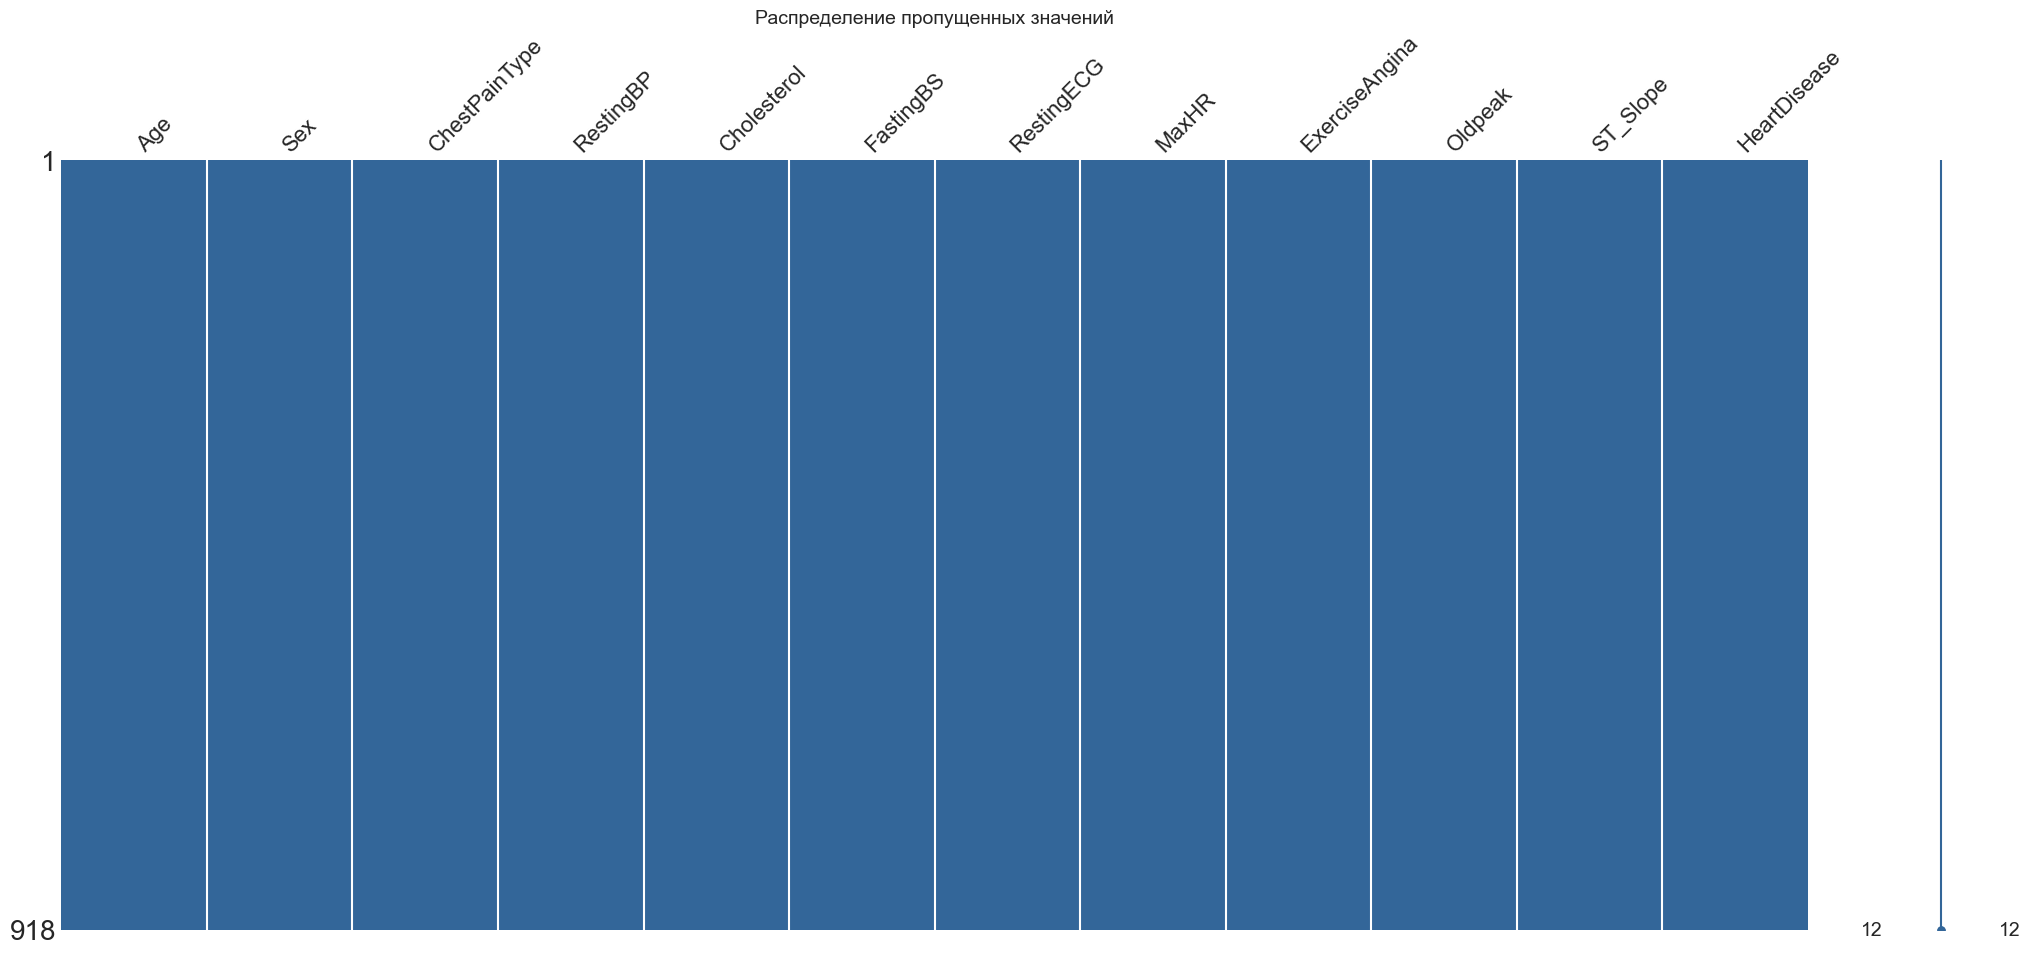

C:\Users\Admino\AppData\Local\Temp\ipykernel_1336\3924786966.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Admino\AppData\Local\Temp\ipykernel_1336\3924786966.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa


Количество пропусков после обработки:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
                      ШАГ 3: ОБРАБОТКА ВЫБРОСОВ                       


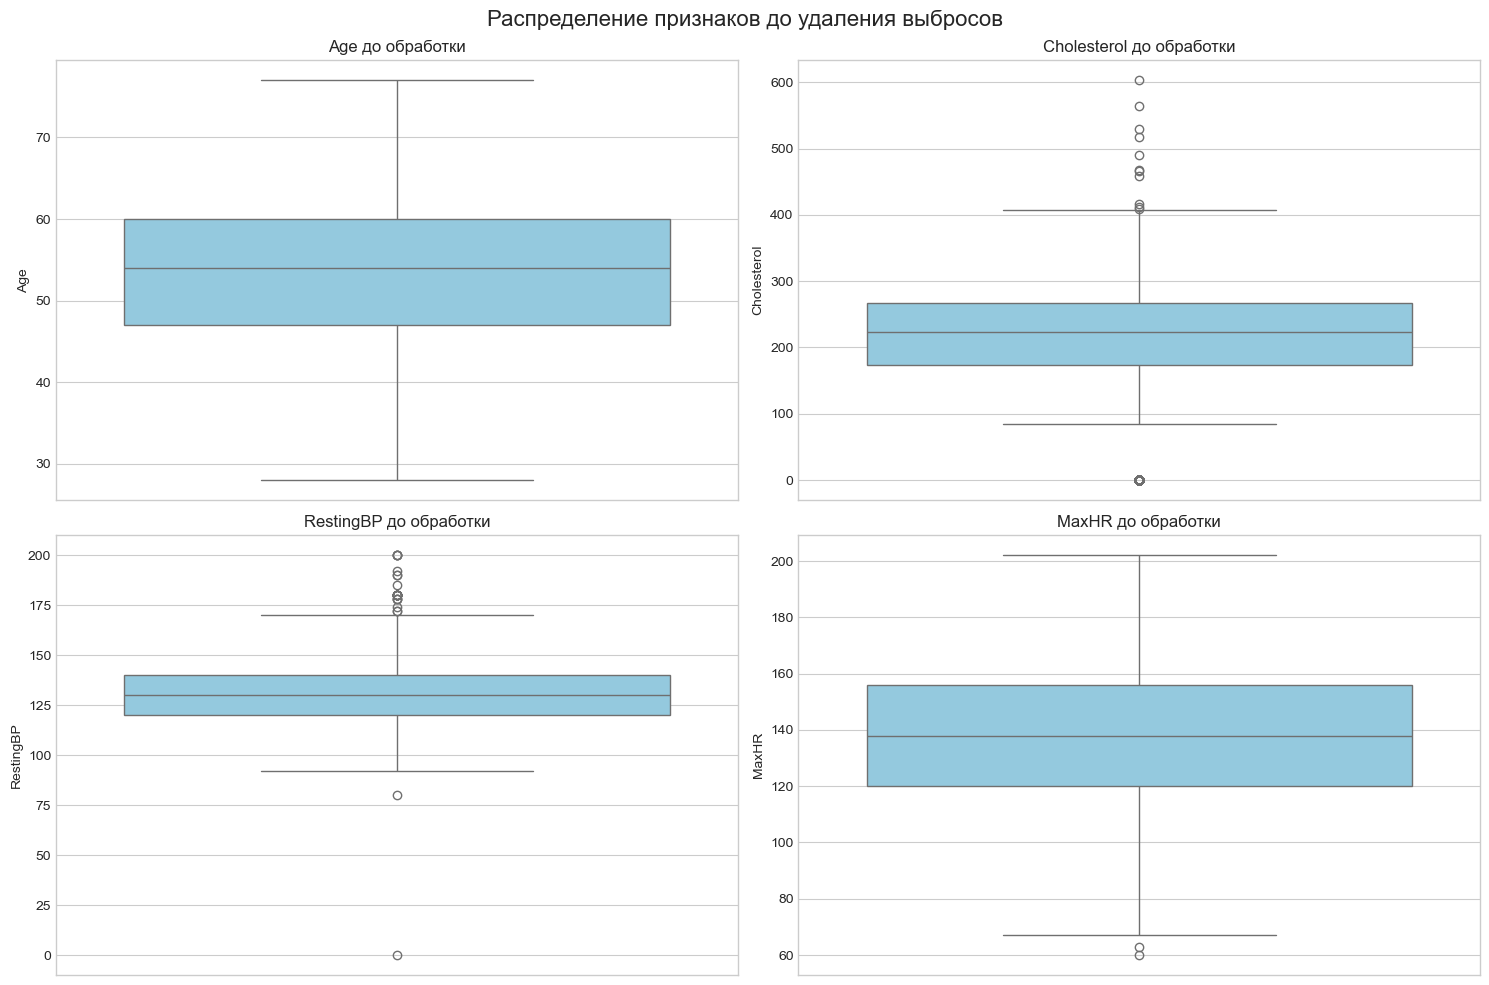


Размер датасета ДО обработки: 918 строк
Размер датасета ПОСЛЕ обработки: 715 строк
Удалено строк: 203 (22.11%)


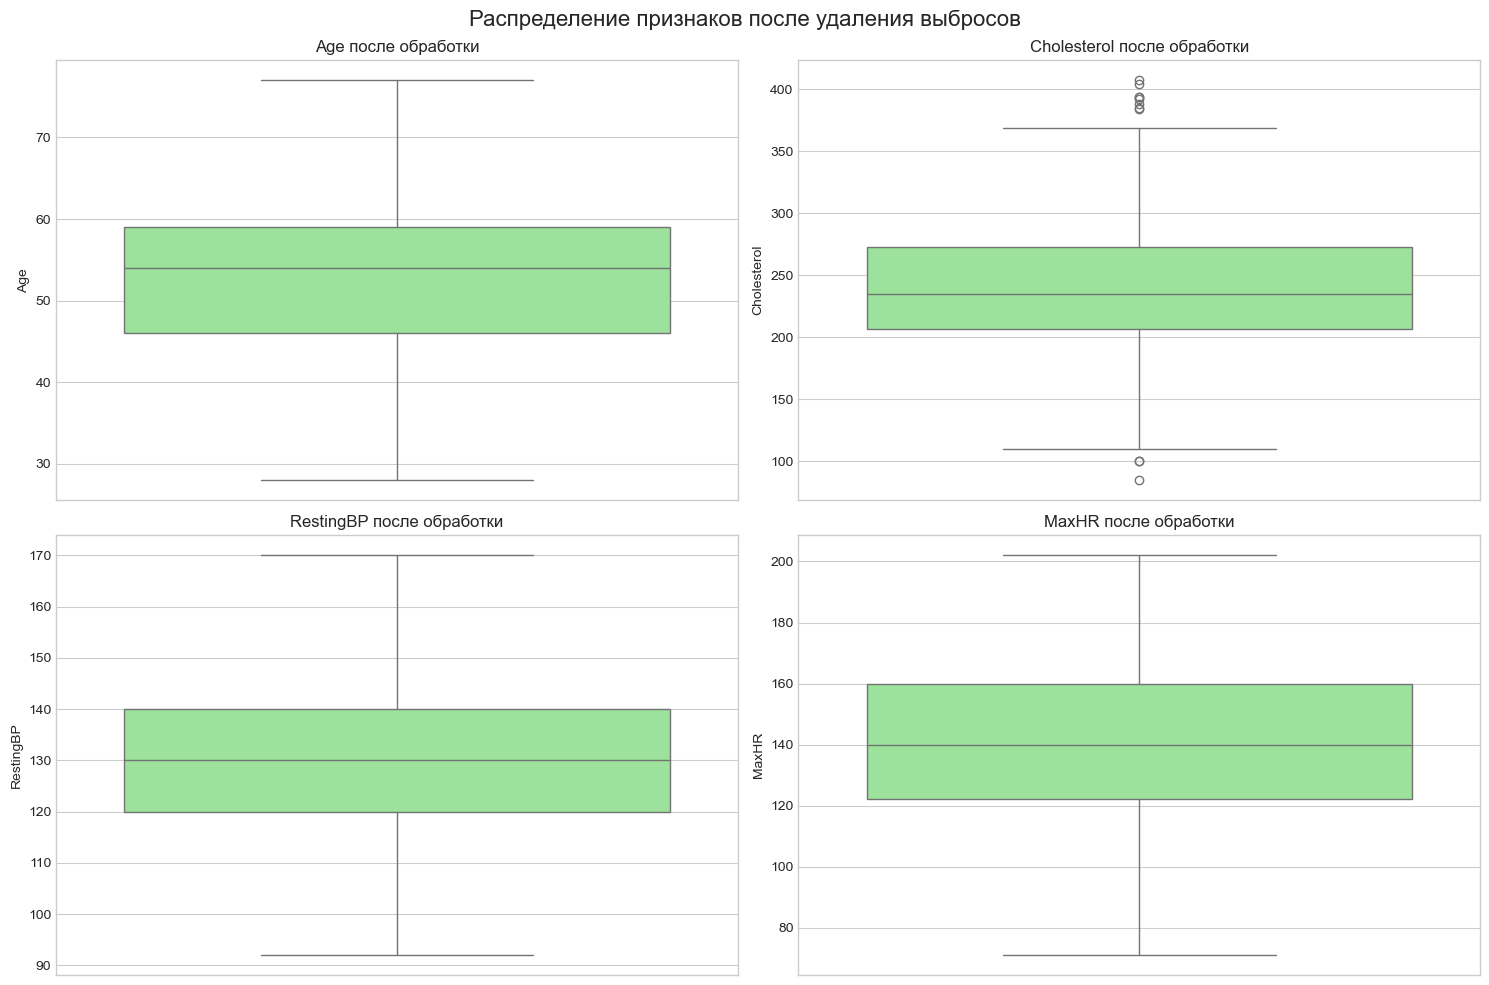

              ШАГ 4: МАСШТАБИРОВАНИЕ ЧИСЛОВЫХ ПРИЗНАКОВ               


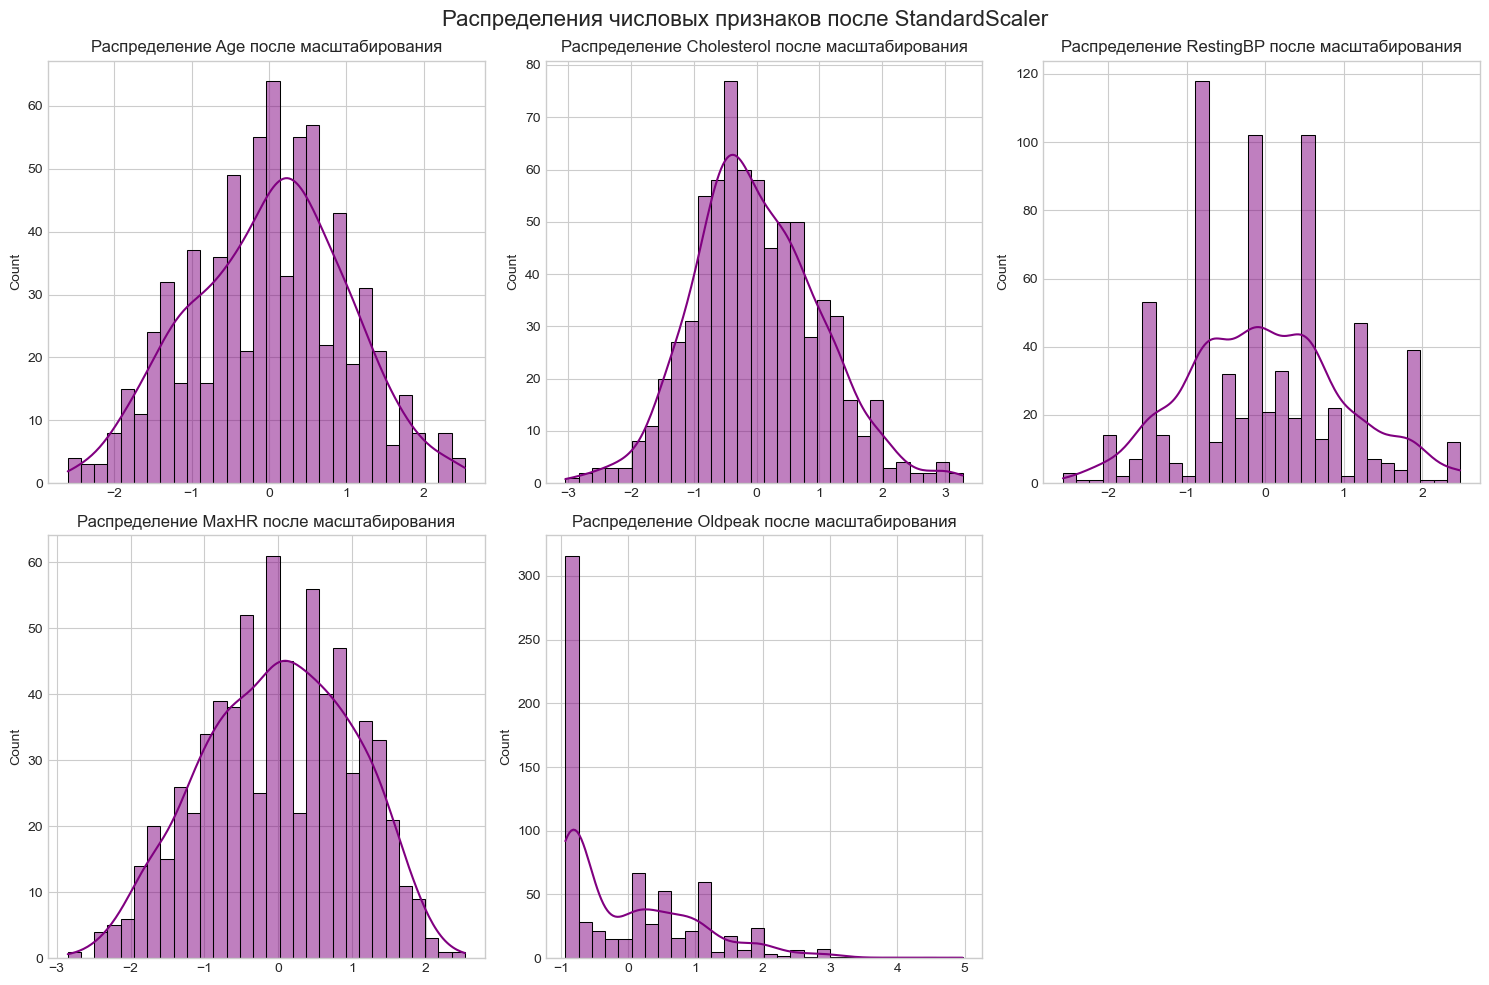

             ШАГ 5: КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ              

Уникальные значения категориальных признаков:
Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
ExerciseAngina: ['N' 'Y']
RestingECG: ['Normal' 'ST' 'LVH']

Первые 5 строк после кодирования:
        Age  Sex  RestingBP  Cholesterol  FastingBS     MaxHR  ExerciseAngina  \
0 -1.343776    1   0.539269     0.962124          0  1.296933               0   
1 -0.400479    0   1.836853    -1.180312          0  0.640055               0   
2 -1.658208    1  -0.109523     0.844191          0 -1.741130               0   
3 -0.505290    0   0.409510    -0.512029          0 -1.330581               1   
4  0.123574    1   1.188061    -0.885481          0 -0.755812               0   

    Oldpeak ST_Slope  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0 -0.839138       Up             0               True              False   
1  0.097605     Flat             1              False               True   
2 -0.839138      

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from scipy import stats

# 1. Загрузка данных
df = pd.read_csv('heart.csv')  # Предполагаем, что файл сохранен как heart_disease.csv

# 2. Обзор структуры данных
print("ШАГ 1: ОБЗОР СТРУКТУРЫ ДАННЫХ".center(70))
print("\nПервые 5 строк данных:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nСтатистические характеристики числовых признаков:")
print(df.describe().round(2))

# 3. Обнаружение и обработка пропущенных значений
print("ШАГ 2: ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ".center(70))

# Проверка пропусков
print("\nКоличество пропусков до обработки:")
print(df.isna().sum())

# Визуализация пропусков
import missingno as msno
msno.matrix(df, color=(0.2, 0.4, 0.6))
plt.title('Распределение пропущенных значений', fontsize=14)
plt.show()

# Заполнение пропусков
# Для числовых признаков - медианой (менее чувствительна к выбросам)
num_cols = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Для категориальных - модой
cat_cols = ['Sex', 'ChestPainType', 'ExerciseAngina', 'RestingECG']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nКоличество пропусков после обработки:")
print(df.isna().sum())

# 4. Обнаружение и удаление выбросов
print("ШАГ 3: ОБРАБОТКА ВЫБРОСОВ".center(70))

# Функция для удаления выбросов по методу IQR
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Построение boxplot до обработки
plt.figure(figsize=(15, 10))
features = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f'{feature} до обработки')

plt.suptitle('Распределение признаков до удаления выбросов', fontsize=16)
plt.tight_layout()
plt.show()

# Удаление выбросов
original_size = df.shape[0]
df_clean = remove_outliers(df, features)
new_size = df_clean.shape[0]

print(f"\nРазмер датасета ДО обработки: {original_size} строк")
print(f"Размер датасета ПОСЛЕ обработки: {new_size} строк")
print(f"Удалено строк: {original_size - new_size} ({((original_size - new_size)/original_size)*100:.2f}%)")

# Построение boxplot после обработки
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_clean[feature], color='lightgreen')
    plt.title(f'{feature} после обработки')

plt.suptitle('Распределение признаков после удаления выбросов', fontsize=16)
plt.tight_layout()
plt.show()

# 5. Масштабирование числовых признаков
print("ШАГ 4: МАСШТАБИРОВАНИЕ ЧИСЛОВЫХ ПРИЗНАКОВ".center(70))

# Создаем копию данных для масштабирования
df_scaled = df_clean.copy()

# Стандартизация числовых признаков
scaler = StandardScaler()
num_features = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR', 'Oldpeak']
df_scaled[num_features] = scaler.fit_transform(df_scaled[num_features])

# Визуализация результатов
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_scaled[feature], kde=True, color='purple', bins=30)
    plt.title(f'Распределение {feature} после масштабирования')
    plt.xlabel('')
    
plt.suptitle('Распределения числовых признаков после StandardScaler', fontsize=16)
plt.tight_layout()
plt.show()

# 6. Кодирование категориальных признаков
print("ШАГ 5: КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ".center(70))

# Выводим уникальные значения категориальных признаков
print("\nУникальные значения категориальных признаков:")
print("Sex:", df_scaled['Sex'].unique())
print("ChestPainType:", df_scaled['ChestPainType'].unique())
print("ExerciseAngina:", df_scaled['ExerciseAngina'].unique())
print("RestingECG:", df_scaled['RestingECG'].unique())

# Копируем данные перед кодированием
df_final = df_scaled.copy()

# Label Encoding для бинарных признаков
binary_cols = ['Sex', 'ExerciseAngina']
for col in binary_cols:
    le = LabelEncoder()
    df_final[col] = le.fit_transform(df_final[col])

# One-Hot Encoding для остальных категориальных признаков
cat_cols = ['ChestPainType', 'RestingECG']
df_final = pd.get_dummies(df_final, columns=cat_cols, drop_first=True)

# Проверка результатов
print("\nПервые 5 строк после кодирования:")
print(df_final.head())

print("\nРазмерность данных после кодирования:")
print(df_final.shape)

# 7. Итоговый обзор данных
print("ИТОГОВЫЙ ОБЗОР ДАННЫХ".center(70))
print(df_final.info())
print("\nСтатистика числовых признаков:")
print(df_final.describe().round(2))

**Индивидуальное практическое задание**<br>
**Цель:** выполнить полноценный исследовательский анализ данных (EDA),
применяя методы выявления и обработки пропусков, выбросов, масштабирования
числовых признаков и кодирования категориальных переменных<br><br>
**Условия выполнения:**
- Выберите реальный табличный датасет со структурой не менее 8
признаков и целевым признаком, подходящим для задач регрессии или
классификации.
- Убедитесь, что в датасете присутствуют:
    - числовые признаки,
    - категориальные признаки,
    - целевой столбец (предсказуемый признак),
    - необязательно: пропущенные значения или выбросы.<br>

**Требования к выполнению:**
1. Обзор структуры данных:
   - Загрузите датасет
   - Выведите общую информацию ( .info() , .describe() ).
   - Опишите: сколько признаков, каких типов, какова структура целевого признака
2. Обнаружение и обработка пропусков:
   - Определите, есть ли пропущенные значения.
   - Обоснуйте выбранный способ их устранения (удаление, заполнение средним/модой и т.д.)
   - Примените выбранный способ.
3. Обнаружение и удаление выбросов:
   - Выберите 3–5 числовых признаков
   - Используя метод IQR, удалите выбросы
   - Сравните объём данных до и после очистки.
4. Масштабирование числовых признаков
   - Выполните стандартизацию (z-преобразование) с помощью StandardScaler
   - Объясните, зачем выполняется масштабирование
5. Кодирование категориальных признаков:
   - Label Encoding для порядковых признаков (при наличии)
   - One-Hot Encoding для номинальных признаков.
   - Проверьте, исключена ли дамми-ловушка
6. Финальный набор данных:
   - Убедитесь, что датасет не содержит пропусков, выбросов, категориальных данных в строковом виде.
   - Признаки приведены к числовому виду, масштабированы.
   - Представьте итоговый DataFrame , готовый к использованию в моделях.




                         ШАГ 1: ОБЗОР СТРУКТУРЫ ДАННЫХ                          

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Статистические характеристики числовых признаков:
          Age  RestingBP  Cholesterol

C:\Users\Admino\AppData\Local\Temp\ipykernel_1336\2916631898.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

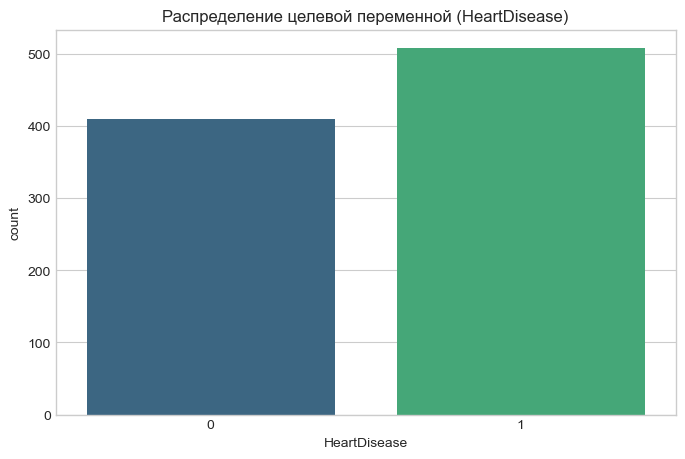

In [26]:
# ПЕРВЫЙ ШАГ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Загрузка данных
df = pd.read_csv('heart.csv')

# Обзор структуры
print("="*80)
print("ШАГ 1: ОБЗОР СТРУКТУРЫ ДАННЫХ".center(80))
print("="*80)

# Основная информация
print("\nОбщая информация о данных:")
print(df.info())

# Статистические характеристики
print("\nСтатистические характеристики числовых признаков:")
print(df.describe().round(2))

# Размерность данных
print(f"\nРазмер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")

# Типы признаков
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
target_col = 'HeartDisease'

print(f"\nЧисловые признаки ({len(num_cols)}): {', '.join(num_cols)}")
print(f"Категориальные признаки ({len(cat_cols)}): {', '.join(cat_cols)}")
print(f"Целевая переменная: {target_col}")

# Анализ целевой переменной
print("\nРаспределение целевой переменной:")
print(df[target_col].value_counts(normalize=True).round(2))
plt.figure(figsize=(8, 5))
sns.countplot(x=target_col, data=df, palette='viridis')
plt.title('Распределение целевой переменной (HeartDisease)')
plt.show



                         ШАГ 1: ОБЗОР СТРУКТУРЫ ДАННЫХ                          

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Статистические характеристики числовых признаков:
          Age  RestingBP  Cholesterol

C:\Users\Admino\AppData\Local\Temp\ipykernel_1336\67945259.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette='viridis')


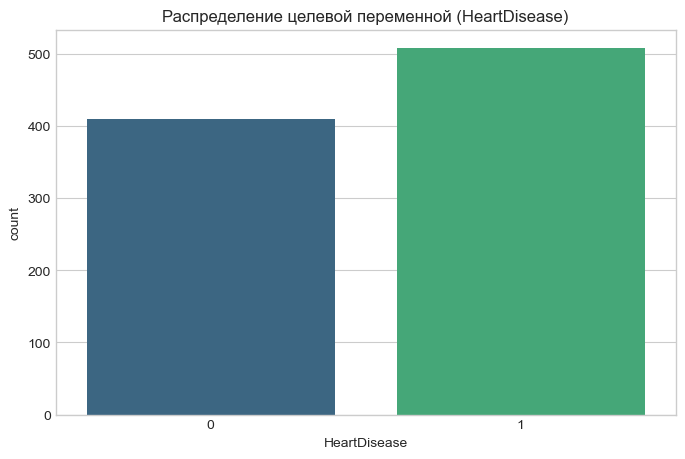

                     ШАГ 2: ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ                      

Количество пропусков до обработки:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


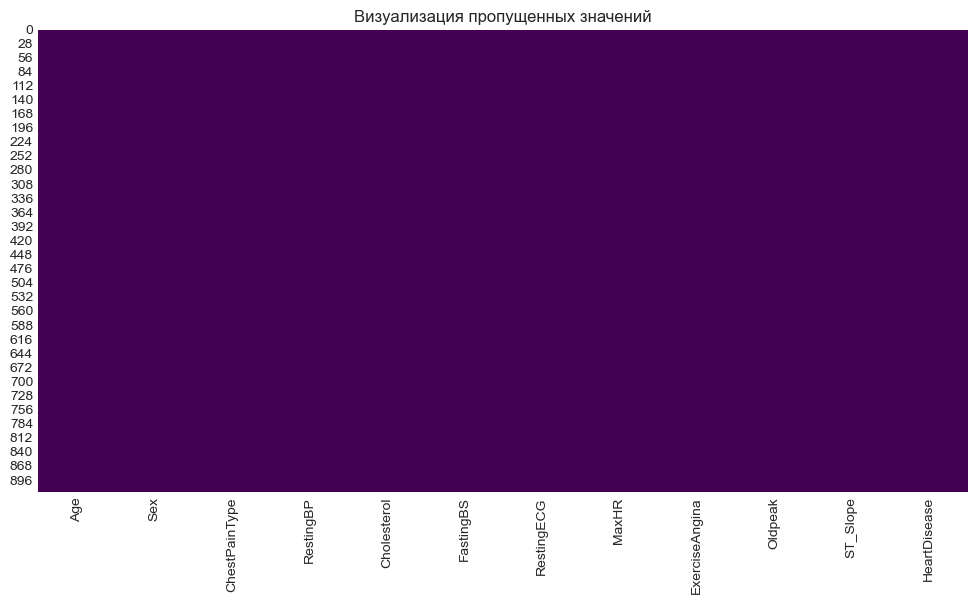

C:\Users\Admino\AppData\Local\Temp\ipykernel_1336\67945259.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\Admino\AppData\Local\Temp\ipykernel_1336\67945259.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

Заполнено пропусков в 'Cholesterol': 0 осталось
Заполнено пропусков в 'RestingBP': 0 осталось
Заполнено пропусков в 'FastingBS': 0 осталось
Заполнено пропусков в 'RestingECG': 0 осталось
Заполнено пропусков в 'ExerciseAngina': 0 осталось

Количество пропусков после обработки:
0 пропусков всего
                           ШАГ 3: ОБРАБОТКА ВЫБРОСОВ                            


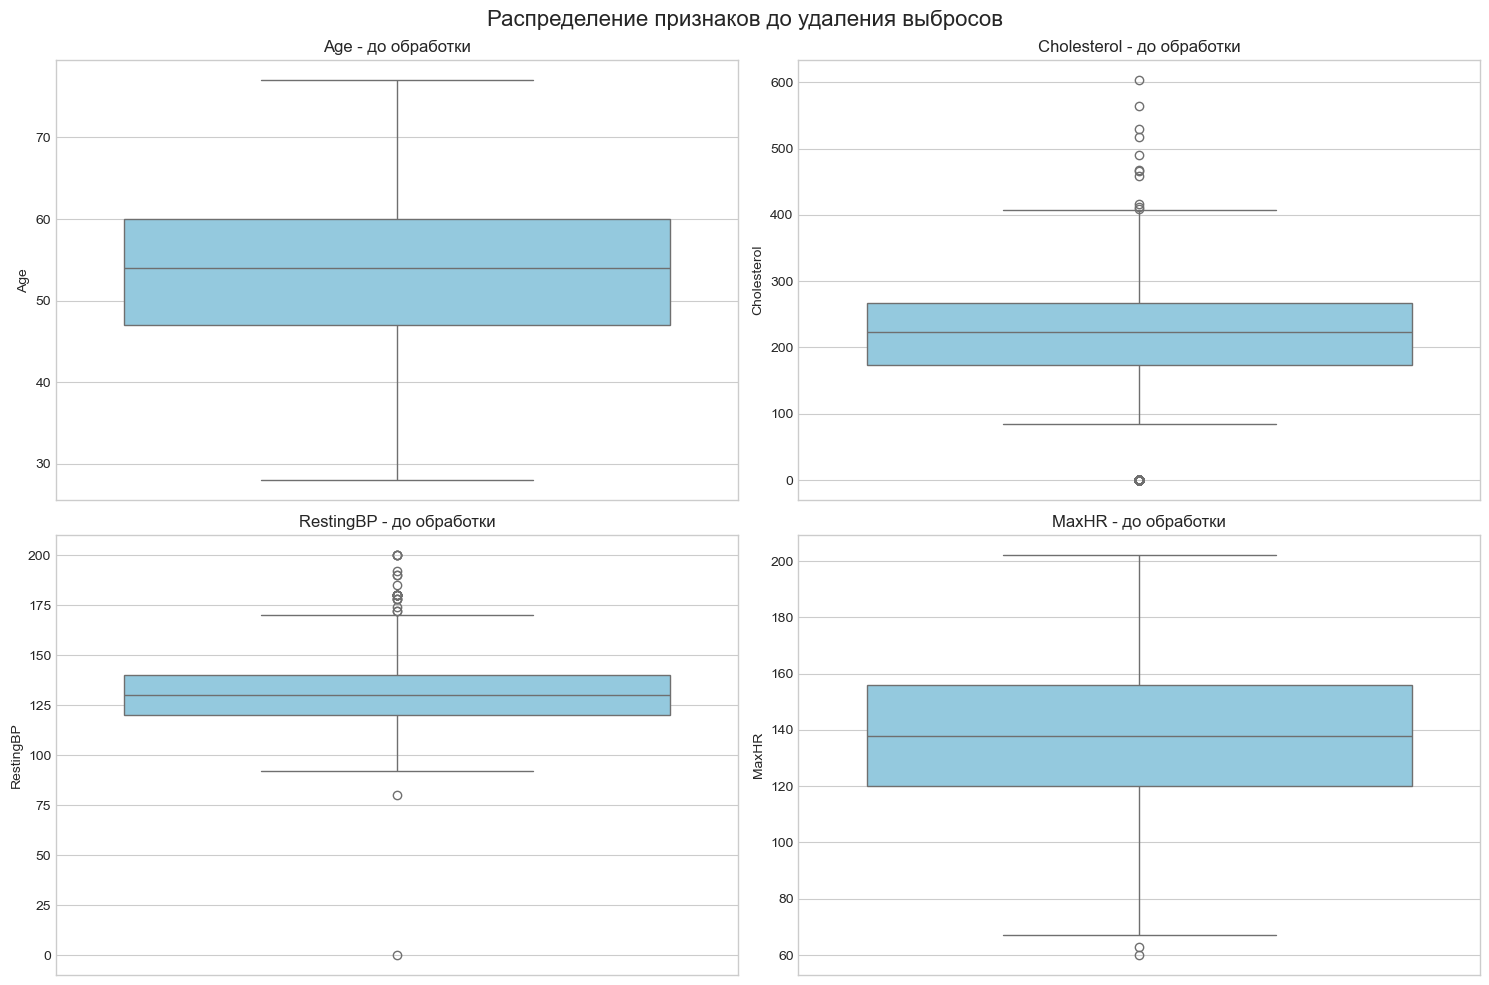

Размер датасета ДО обработки: 918 строк
Размер датасета ПОСЛЕ обработки: 715 строк
Удалено строк: 203 (22.11%)


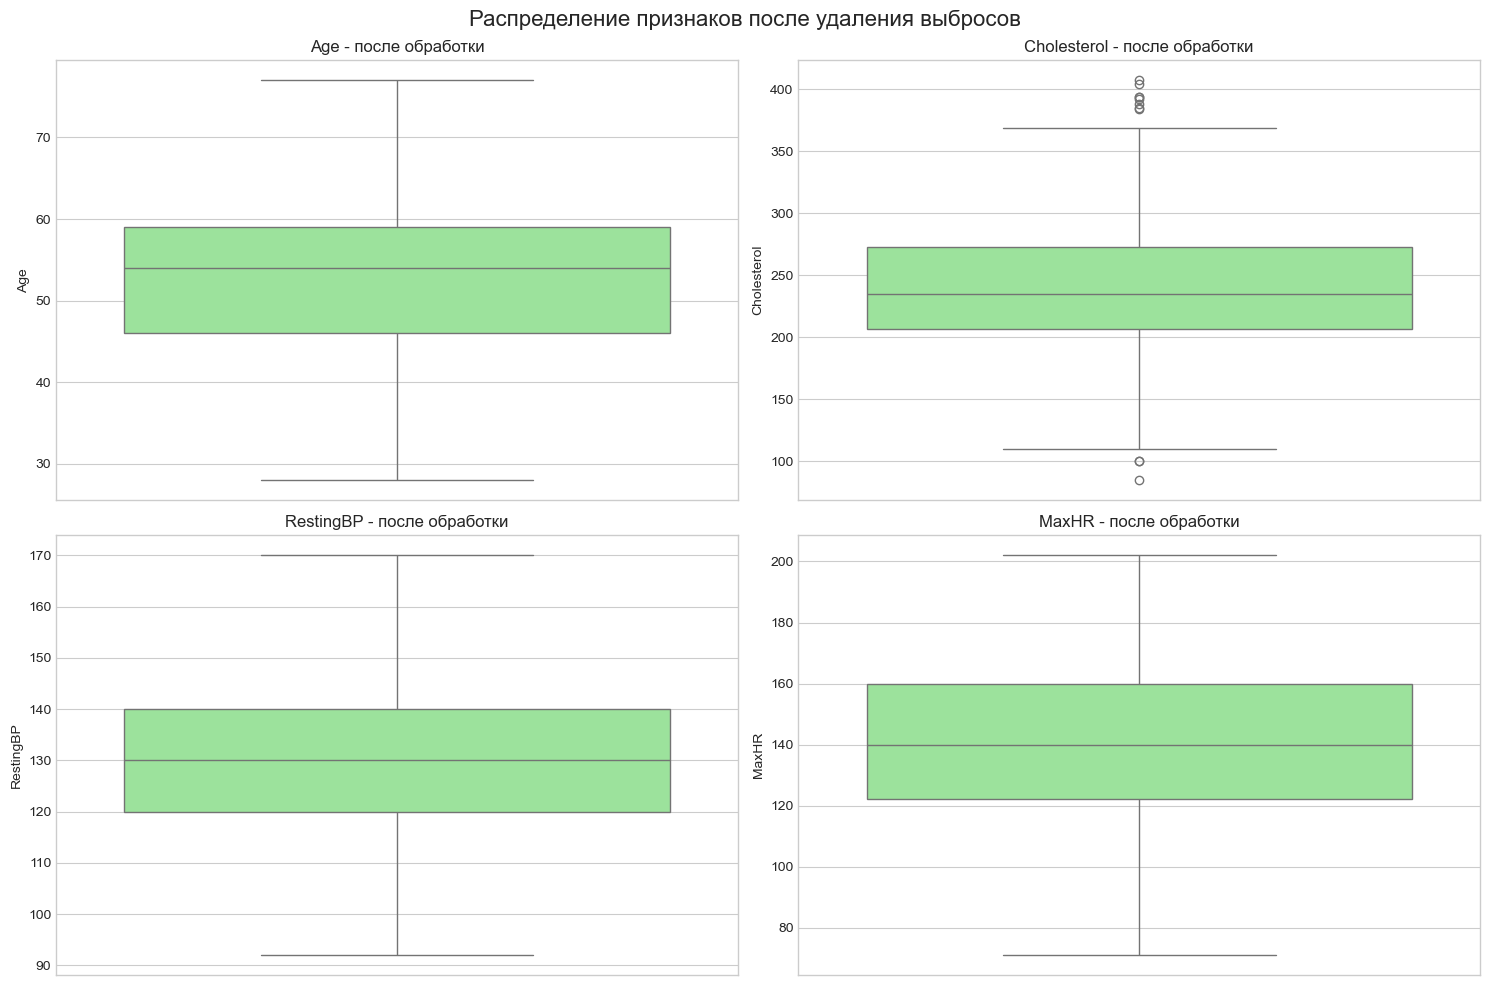

                   ШАГ 4: МАСШТАБИРОВАНИЕ ЧИСЛОВЫХ ПРИЗНАКОВ                    


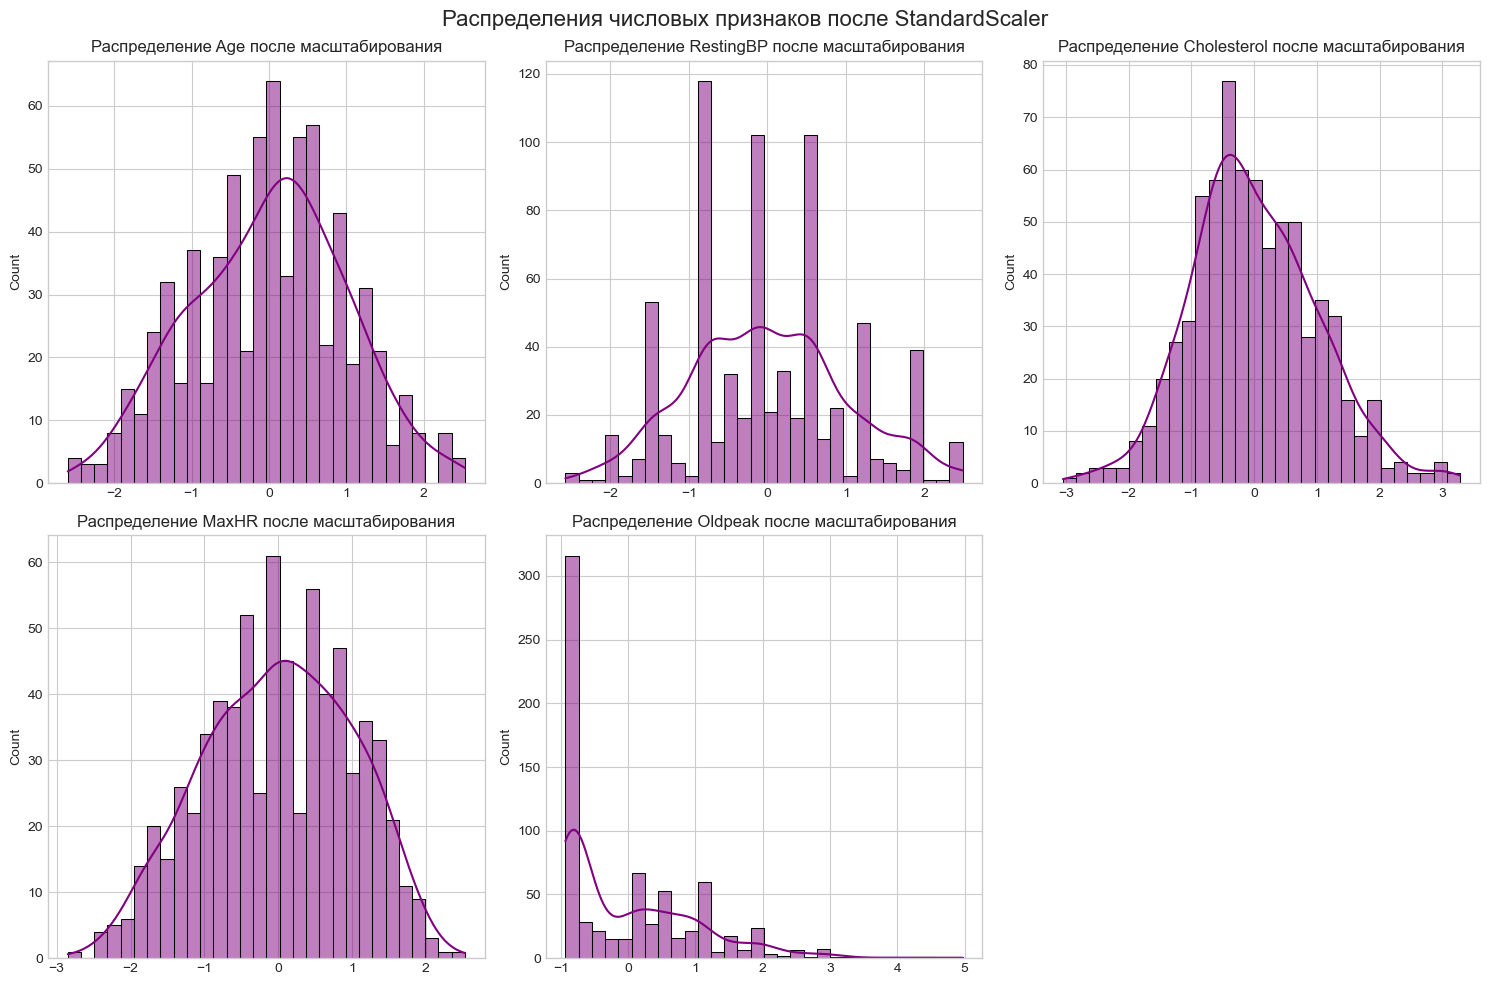

                  ШАГ 5: КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ                   

Уникальные значения категориальных признаков:
Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']

Размерность данных после кодирования:
Было столбцов: 12
Стало столбцов: 16
Добавлено столбцов: 4
                         ШАГ 6: ФИНАЛЬНЫЙ НАБОР ДАННЫХ                          

Проверка данных:
- Пропуски: 0
- Категориальные данные: 0 столбцов
- Числовые признаки масштабированы: True
- Дамми-ловушка исключена: все категориальные признаки преобразованы корректно

Первые 5 строк финального датасета:
        Age  Sex  RestingBP  Cholesterol  FastingBS     MaxHR  ExerciseAngina  \
0 -1.343776    1   0.539269     0.962124          0  1.296933               0   
1 -0.400479    0   1.836853    -1.180312          0  0.640055               0   
2 -1.658208    1  -0.109523     0.844191          0 -1.741130               0  

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Загрузка данных
df = pd.read_csv('heart.csv')

# Обзор структуры
print("ШАГ 1: ОБЗОР СТРУКТУРЫ ДАННЫХ".center(80))

# Основная информация
print("\nОбщая информация о данных:")
print(df.info())

# Статистические характеристики
print("\nСтатистические характеристики числовых признаков:")
print(df.describe().round(2))

# Размерность данных
print(f"\nРазмер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")

# Типы признаков
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
target_col = 'HeartDisease'

print(f"\nЧисловые признаки ({len(num_cols)}): {', '.join(num_cols)}")
print(f"Категориальные признаки ({len(cat_cols)}): {', '.join(cat_cols)}")
print(f"Целевая переменная: {target_col}")

# Анализ целевой переменной
print("\nРаспределение целевой переменной:")
print(df[target_col].value_counts(normalize=True).round(2))
plt.figure(figsize=(8, 5))
sns.countplot(x=target_col, data=df, palette='viridis')
plt.title('Распределение целевой переменной (HeartDisease)')
plt.show()

# Проверка пропусков
print("ШАГ 2: ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ".center(80))
print("\nКоличество пропусков до обработки:")
print(df.isna().sum())

# Визуализация пропусков
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Визуализация пропущенных значений')
plt.show()

# Заполнение пропусков
num_cols_to_fill = ['Cholesterol', 'RestingBP', 'FastingBS']
cat_cols_to_fill = ['RestingECG', 'ExerciseAngina']

for col in num_cols_to_fill:
    if col in df.columns:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Заполнено пропусков в '{col}': {df[col].isna().sum()} осталось")

for col in cat_cols_to_fill:
    if col in df.columns:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Заполнено пропусков в '{col}': {df[col].isna().sum()} осталось")

print("\nКоличество пропусков после обработки:")
print(df.isna().sum().sum(), "пропусков всего")


print("ШАГ 3: ОБРАБОТКА ВЫБРОСОВ".center(80))
# Выбор признаков для анализа выбросов
outlier_features = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR']

# Визуализация выбросов до обработки
plt.figure(figsize=(15, 10))
for i, feature in enumerate(outlier_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f'{feature} - до обработки')
plt.suptitle('Распределение признаков до удаления выбросов', fontsize=16)
plt.tight_layout()
plt.show()

# Функция для удаления выбросов по методу IQR
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Удаление выбросов
original_size = df.shape[0]
df_clean = remove_outliers(df, outlier_features)
new_size = df_clean.shape[0]

print(f"Размер датасета ДО обработки: {original_size} строк")
print(f"Размер датасета ПОСЛЕ обработки: {new_size} строк")
print(f"Удалено строк: {original_size - new_size} ({((original_size - new_size)/original_size)*100:.2f}%)")

# Визуализация после обработки
plt.figure(figsize=(15, 10))
for i, feature in enumerate(outlier_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_clean[feature], color='lightgreen')
    plt.title(f'{feature} - после обработки')
plt.suptitle('Распределение признаков после удаления выбросов', fontsize=16)
plt.tight_layout()
plt.show()

print("ШАГ 4: МАСШТАБИРОВАНИЕ ЧИСЛОВЫХ ПРИЗНАКОВ".center(80))

# Выбор числовых признаков для масштабирования
num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Копируем данные перед масштабированием
df_scaled = df_clean.copy()

# Стандартизация
scaler = StandardScaler()
df_scaled[num_features] = scaler.fit_transform(df_scaled[num_features])


# Визуализация результатов
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_scaled[feature], kde=True, color='purple', bins=30)
    plt.title(f'Распределение {feature} после масштабирования')
    plt.xlabel('')
plt.suptitle('Распределения числовых признаков после StandardScaler', fontsize=16)
plt.tight_layout()
plt.show()

print("ШАГ 5: КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ".center(80))

# Анализ категориальных признаков
cat_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

print("\nУникальные значения категориальных признаков:")
for feature in cat_features:
    print(f"{feature}: {df_scaled[feature].unique()}")

# Создаем финальную версию датасета
df_final = df_scaled.copy()

# Label Encoding для бинарных признаков
binary_features = ['Sex', 'ExerciseAngina']
le = LabelEncoder()
for feature in binary_features:
    df_final[feature] = le.fit_transform(df_final[feature])

# One-Hot Encoding для остальных категориальных признаков
multi_cat_features = ['ChestPainType', 'RestingECG', 'ST_Slope']
df_final = pd.get_dummies(df_final, columns=multi_cat_features, drop_first=True)

# Проверка на дамми-ловушку
"""
Проверка дамми-ловушки:
- Для каждой категориальной переменной с n категориями создано n-1 бинарных признаков
- Параметр drop_first=True автоматически удаляет первый столбец для каждой категории
- Это исключает мультиколлинеарность (дамми-ловушку)
"""

# Результаты кодирования
print("\nРазмерность данных после кодирования:")
print(f"Было столбцов: {df_scaled.shape[1]}")
print(f"Стало столбцов: {df_final.shape[1]}")
print(f"Добавлено столбцов: {df_final.shape[1] - df_scaled.shape[1]}")

print("ШАГ 6: ФИНАЛЬНЫЙ НАБОР ДАННЫХ".center(80))

# Проверка финального датасета
print("\nПроверка данных:")
print("- Пропуски:", df_final.isna().sum().sum())
print("- Категориальные данные:", df_final.select_dtypes(include=['object']).shape[1], "столбцов")
print("- Числовые признаки масштабированы:", all(df_final[num_features].std().round(2) == 1.0))
print("- Дамми-ловушка исключена: все категориальные признаки преобразованы корректно")

# Отображение финального датасета
print("\nПервые 5 строк финального датасета:")
print(df_final.head())

# Сохранение обработанных данных
df_final.to_csv('preprocessed_heart_failure.csv', index=False)
print("\nФинальный датасет сохранен как 'preprocessed_heart_failure.csv'")